In [24]:
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [91]:
font = {'family': 'Arial', 'size': 20}
mpl.rc('font', **font)

## 1. Prepare the datasets

### 1-1. Prepare HPA dataset

#### Import HPA: my processed dataset

In [2]:
df_HPA = pd.read_csv('./Output/HPA_NE-NP-ER_Hs.csv')
df_HPA.head()

,Unnamed: 0,Gene_name,Subcellular_loc_HPA,EvidenceLevel_HPA,Subcellular_location,Uniprot_id
0,0,TPR,['Nuclear membrane'],Enhanced,Nuclear_membrane,P12270
1,1,XPO1,"['Nucleoplasm', 'Nuclear membrane']",Enhanced,Nuclear_membrane,O14980
2,2,NUP50,"['Nucleoplasm', 'Nuclear membrane']",Enhanced,Nuclear_membrane,Q9UKX7
3,3,RANGAP1,['Nuclear membrane'],Enhanced,Nuclear_membrane,P46060
4,4,EMD,['Nuclear membrane'],Enhanced,Nuclear_membrane,P50402


In [4]:
df_HPA['Subcellular_location'].unique()

array(['Nuclear_membrane', 'Nucleoplasm', 'ER'], dtype=object)

#### Import HPA: table S6, which is more covenient

In [2]:
df_HPA_all = pd.read_excel('./SourceData/HPA/aal3321_thul_sm_table_s6.xlsx')
df_HPA_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12003 entries, 0 to 12002
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ENSG                            12003 non-null  object
 1   Gene                            12003 non-null  object
 2   Uniprot                         11854 non-null  object
 3   Nucleus                         12003 non-null  int64 
 4   Nucleoplasm                     12003 non-null  int64 
 5   Nuclear bodies                  12003 non-null  int64 
 6   Nuclear speckles                12003 non-null  int64 
 7   Nuclear membrane                12003 non-null  int64 
 8   Nucleoli                        12003 non-null  int64 
 9   Nucleoli (Fibrillar center)     12003 non-null  int64 
 10  Cytosol                         12003 non-null  int64 
 11  Cytoplasmic bodies              12003 non-null  int64 
 12  Rods and Rings                  12003 non-null

/Users/ShokenLEE/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
df_HPA_all.head()

,ENSG,Gene,Uniprot,Nucleus,Nucleoplasm,Nuclear bodies,Nuclear speckles,Nuclear membrane,Nucleoli,Nucleoli (Fibrillar center),...,Endoplasmic reticulum,Golgi apparatus,Vesicles,Plasma membrane,Cell Junctions,Reliability,IF location score,IF main protein location,IF additional protein location,HyperLOPIT location
0,ENSG00000148584,A1CF,Q9NQ94,0,1,0,0,0,0,0,...,0,0,0,0,0,Supported,Nucleoplasm: Supported,Nucleoplasm,NaN,NaN
1,ENSG00000128274,A4GALT,Q9NPC4,0,0,0,0,0,0,0,...,0,0,0,0,0,Supported,Mitochondria: Supported,Mitochondria,NaN,NaN
2,ENSG00000094914,AAAS,Q9NRG9,0,0,0,0,1,0,0,...,0,0,0,0,0,Approved,Nuclear membrane: Approved;Centrosome: Approve...,Nuclear membrane,Centrosome;Cytosol,unknown
3,ENSG00000081760,AACS,Q86V21,0,0,0,0,0,0,0,...,0,0,1,0,0,Approved,Vesicles: Approved,Vesicles,NaN,unknown
4,ENSG00000109576,AADAT,Q8N5Z0,0,0,0,0,0,0,0,...,0,0,1,1,0,Approved,Vesicles: Approved;Plasma membrane: Approved,Plasma membrane,Vesicles,NaN


In [32]:
category_reliability = ['Validated', 'Supported', 'Approved', 'Uncertain']

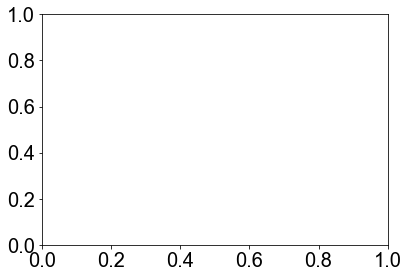

Text(0.5, 1.0, 'HPA localization reliablity')

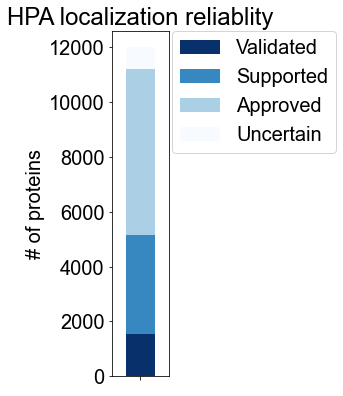

In [98]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# make a dataframe for plotting
df = pd.DataFrame()
for category in category_reliability:
    df.loc[" ", category] = len(df_HPA_all[df_HPA_all['Reliability'] == category])
    
# plot
df.plot(kind='bar', ax=ax, stacked=True, figsize=(1,6), colormap="Blues_r")
plt.ylabel('# of proteins')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('HPA localization reliablity')

In [99]:
fig.savefig('./Output/HPA_by_reliability.jpg', bbox_inches='tight')

#### Keep only "Validated" or "Supported"

In [79]:
df_HPA_VorS = df_HPA_all[(df_HPA_all['Reliability'] == 'Validated')|(df_HPA_all['Reliability'] == 'Supported')]
df_HPA_VorS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5148 entries, 0 to 12000
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ENSG                            5148 non-null   object
 1   Gene                            5148 non-null   object
 2   Uniprot                         5129 non-null   object
 3   Nucleus                         5148 non-null   int64 
 4   Nucleoplasm                     5148 non-null   int64 
 5   Nuclear bodies                  5148 non-null   int64 
 6   Nuclear speckles                5148 non-null   int64 
 7   Nuclear membrane                5148 non-null   int64 
 8   Nucleoli                        5148 non-null   int64 
 9   Nucleoli (Fibrillar center)     5148 non-null   int64 
 10  Cytosol                         5148 non-null   int64 
 11  Cytoplasmic bodies              5148 non-null   int64 
 12  Rods and Rings                  5148 non-null  

#### Among them, nuclear proteins and else

In [80]:
df_HPA_VorS_Nuc = df_HPA_VorS[df_HPA_VorS['IF location score'].str.contains('Nucle')]
df_HPA_VorS_non_Nuc = df_HPA_VorS[~df_HPA_VorS['IF location score'].str.contains('Nucle')]

### 1-2. Prepare NLSdb dataset

#### Import NLSdb

In [81]:
df_NLSdb = pd.read_csv('./Output/Hs_proteome_w_NLS_by_NLSdb.csv')

In [7]:
df_NLSdb.head()

,Entry,Protein names,Gene names,Annotation,Status,Sequence,NLS locations
0,A6H8Y1,Transcription factor TFIIIB component B'' homo...,BDP1 KIAA1241 KIAA1689 TFNR,5 out of 5,reviewed,MFRRARLSVKPNVRPGVGARGSTASNPQRGRESPRPPDPATDSASK...,"{'KKRRRK': 461, 'KRPKP': 1438, 'SKKEPR': 1853}"
1,O60885,Bromodomain-containing protein 4 (Protein HUNK1),BRD4 HUNK1,5 out of 5,reviewed,MSAESGPGTRLRNLPVMGDGLETSQMSTTQAQAQPQPANAASTNPP...,"{'AKGRGR': 175, 'GVKRKA': 286, 'HKRKE': 550, '..."
2,P22223,Cadherin-3 (Placental cadherin) (P-cadherin),CDH3 CDHP,5 out of 5,reviewed,MGLPRGPLASLLLLQVCWLQCAASEPCRAVFREAEVTLEAGGAEQE...,{'KKRKIK': 678}
3,Q01518,Adenylyl cyclase-associated protein 1 (CAP 1),CAP1 CAP,5 out of 5,reviewed,MADMQNLVERLERAVGRLEAVSHTSDMHRGYADSPSKAGAAPYVQA...,{'RATKK': 312}
4,Q53TQ3,INO80 complex subunit D,INO80D,5 out of 5,reviewed,MYEGKHIHFSEVDNKPLCSYSPKLCKQRRLNGYAFCIRHVLEDKTA...,"{'HAKKM': 509, 'RRRGPR': 550}"


## 2. How many of Nuclear and Non-nuclear proteins in HPA are found in NLSdb?

In [82]:
def howManyInNLSdb(_df, UPidName):
    """
    Count how many proteins in a given dataset is found in NLSdb
    _df: query dataframe e.g. df_HPA_...
    UPidName: Name of the column that contains uniprot IDs in query df
    
    returns: number of overlap b/w query df and df_NLSdb
    
    """
    
    _df_merge = _df.merge(df_NLSdb, how='inner', left_on = UPidName,
                              right_on = 'Entry')
    return len(_df_merge)

### ***As shown below, it appears nuclear proteins in HPA enriches proteins with NLS from NLSdb***

In [36]:
# fraction of NLSdb proteins found in nuclear proteins from HPA
print(howManyInNLSdb(df_HPA_VorS_Nuc, 'Uniprot') / len(df_HPA_VorS_Nuc))

0.34449138771530713


Text(0.5, 1.0, 'Nuclear protein in HPA: \nfound in NLSdb or Not')

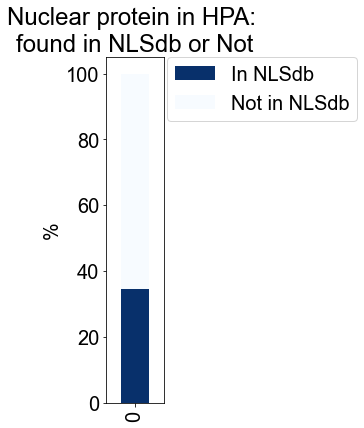

In [100]:
df = pd.DataFrame()
df.loc[0, "In NLSdb"] = (howManyInNLSdb(df_HPA_VorS_Nuc, 'Uniprot') / len(df_HPA_VorS_Nuc)) * 100
df.loc[0, "Not in NLSdb"] = 100 - (howManyInNLSdb(df_HPA_VorS_Nuc, 'Uniprot') / len(df_HPA_VorS_Nuc)) * 100
    
# plot
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

df.plot(kind='bar', ax=ax, stacked=True, figsize=(1,6), colormap="Blues_r")
plt.ylabel('%')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Nuclear protein in HPA: \nfound in NLSdb or Not')

In [101]:
fig.savefig('./Output/HPA-nuclear_inNLSdb.jpg', bbox_inches='tight')

In [38]:
# fraction of NLSdb proteins found in non-nuclear proteins from HPA
print(howManyInNLSdb(df_HPA_VorS_non_Nuc, 'Uniprot') / len(df_HPA_VorS_non_Nuc))

0.06856591018831483


Text(0.5, 1.0, 'Non-nuclear protein in HPA: \nfound in NLSdb or Not')

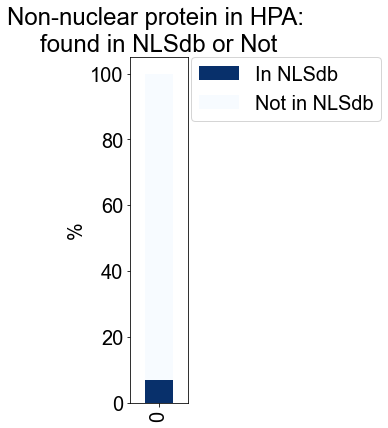

In [102]:
df = pd.DataFrame()
df.loc[0, "In NLSdb"] = (howManyInNLSdb(df_HPA_VorS_non_Nuc, 'Uniprot') / len(df_HPA_VorS_non_Nuc)) * 100
df.loc[0, "Not in NLSdb"] = 100 - (howManyInNLSdb(df_HPA_VorS_non_Nuc, 'Uniprot') / len(df_HPA_VorS_non_Nuc)) * 100
    
# plot
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

df.plot(kind='bar', ax=ax, stacked=True, figsize=(1,6), colormap="Blues_r")
plt.ylabel('%')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Non-nuclear protein in HPA: \nfound in NLSdb or Not')

In [103]:
fig.savefig('./Output/HPA-non-nuclear_inNLSdb.jpg', bbox_inches='tight')